In [5]:
import os
# from pycharm
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from tempfile import gettempdir

from l5kit.configs import load_config_data
from l5kit.data import ChunkedDataset, LocalDataManager
from l5kit.dataset import EgoDatasetVectorized
from l5kit.planning.vectorized.closed_loop_model import VectorizedUnrollModel
from l5kit.planning.vectorized.open_loop_model import VectorizedModel
from l5kit.vectorization.vectorizer_builder import build_vectorizer

from torch.utils.tensorboard import SummaryWriter

import sys
from pathlib import Path
# project_path = str(Path(__file__).parents[1])
project_path = "/mnt/share_disk/user/daixingyuan/l5kit"
print("project path: ", project_path)
sys.path.append(project_path)
print(sys.path)

# prepare data path and load cfg
os.environ["L5KIT_DATA_FOLDER"] = "/mnt/share_disk/user/public/l5kit/prediction"

dm = LocalDataManager(None)
# get config

# Home path
from pathlib import Path

dm = LocalDataManager(None)
# get config
cfg = load_config_data(str(Path(project_path, "examples/urban_driver/config.yaml")))

# ===== INIT DATASET
dataset_path = dm.require(cfg["train_data_loader"]["key"])

train_zarr = ChunkedDataset(dataset_path).open()
vectorizer = build_vectorizer(cfg, dm)
train_dataset = EgoDatasetVectorized(cfg, train_zarr, vectorizer)

print(train_zarr)

project path:  /mnt/share_disk/user/daixingyuan/l5kit
['C:\\Users\\XY\\AppData\\Local\\JetBrains\\Toolbox\\apps\\PyCharm-P\\ch-0\\221.5080.212\\plugins\\python\\helpers-pro\\jupyter_debug', 'C:\\Users\\XY\\AppData\\Local\\JetBrains\\Toolbox\\apps\\PyCharm-P\\ch-0\\221.5080.212\\plugins\\python\\helpers\\pydev', '/mnt/share_disk/user/daixingyuan/l5kit/examples/offline_rl', '/usr/local/envs/l5kit/lib/python38.zip', '/usr/local/envs/l5kit/lib/python3.8', '/usr/local/envs/l5kit/lib/python3.8/lib-dynload', '', '/mnt/share_disk/user/.local/lib/python3.8/site-packages', '/mnt/share_disk/user/xijinhao/l5kit/l5kit', '/mnt/share_disk/user/changzhuorui/DenseTNT/DenseTNT/src/argoverse_api', '/usr/local/envs/l5kit/lib/python3.8/site-packages', '/mnt/share_disk/user/daixingyuan/l5kit', '/mnt/share_disk/user/daixingyuan/l5kit']
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
| Num Sce

In [6]:
from l5kit.rasterization import build_rasterizer
from l5kit.dataset import EgoDataset, AgentDataset
from l5kit.visualization import draw_trajectory, TARGET_POINTS_COLOR
from l5kit.geometry import transform_points


traffic_signal_scene_id = 13

cfg = load_config_data(Path(project_path, "examples/visualisation", "./visualisation_config.yaml"))

rast = build_rasterizer(cfg, dm)
image_dataset = EgoDataset(cfg, train_zarr, rast)
image_dataset = image_dataset.get_scene_dataset(traffic_signal_scene_id)
print(image_dataset)

+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
| Num Scenes | Num Frames | Num Agents | Num TR lights | Total Time (hr) | Avg Frames per Scene | Avg Agents per Frame | Avg Scene Time (sec) | Avg Frame frequency |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
|     1      |    249     |   22099    |      6228     |       0.01      |        249.00        |        88.75         |        24.90         |        10.00        |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+


In [7]:
def load_dataset(cfg, traffic_signal_scene_id=None):
    dm = LocalDataManager(None)
    # ===== INIT DATASET
    # cfg["train_data_loader"]["key"] = "train.zarr"
    train_zarr = ChunkedDataset(dm.require(cfg["train_data_loader"]["key"])).open()

    vectorizer = build_vectorizer(cfg, dm)
    train_dataset = EgoDatasetVectorized(cfg, train_zarr, vectorizer)

    # todo demo for single scene
    if traffic_signal_scene_id:
        train_dataset = train_dataset.get_scene_dataset(traffic_signal_scene_id)
    print(train_dataset)
    return train_dataset



cfg = load_config_data(str(Path(project_path, "examples/urban_driver/config.yaml")))

train_dataset = load_dataset(cfg, traffic_signal_scene_id)



+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
| Num Scenes | Num Frames | Num Agents | Num TR lights | Total Time (hr) | Avg Frames per Scene | Avg Agents per Frame | Avg Scene Time (sec) | Avg Frame frequency |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
|     1      |    249     |   22099    |      6228     |       0.01      |        249.00        |        88.75         |        24.90         |        10.00        |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+


In [8]:
from l5kit.visualization.visualizer.zarr_utils import zarr_to_visualizer_scene
from l5kit.visualization.visualizer.visualizer import visualize
from bokeh.io import output_notebook, show
from l5kit.data import MapAPI

In [27]:
output_notebook()
mapAPI = MapAPI.from_cfg(dm, cfg)
for scene_idx in [traffic_signal_scene_id]:
    out = zarr_to_visualizer_scene(train_zarr.get_scene_dataset(scene_idx), mapAPI)
    out_vis = visualize(scene_idx, out)
    show(out_vis)

Loading BokehJS ...

/mnt/share_disk/user/xijinhao/l5kit/l5kit/l5kit/data/zarr_dataset.py:213: RuntimeWarning: zarr dataset path should end with .zarr (for now). Open will fail for this dataset!
  dataset = ChunkedDataset("")


## Input

In [10]:
print(train_dataset[0].keys())
print()
print(train_dataset[0])

dict_keys(['extent', 'type', 'agent_from_world', 'world_from_agent', 'target_positions', 'target_yaws', 'target_extents', 'target_availabilities', 'history_positions', 'history_yaws', 'history_extents', 'history_availabilities', 'centroid', 'yaw', 'speed', 'all_other_agents_history_positions', 'all_other_agents_history_yaws', 'all_other_agents_history_extents', 'all_other_agents_history_availability', 'all_other_agents_future_positions', 'all_other_agents_future_yaws', 'all_other_agents_future_extents', 'all_other_agents_future_availability', 'all_other_agents_types', 'agent_trajectory_polyline', 'agent_polyline_availability', 'other_agents_polyline', 'other_agents_polyline_availability', 'lanes', 'lanes_availabilities', 'lanes_mid', 'lanes_mid_availabilities', 'crosswalks', 'crosswalks_availabilities', 'scene_index', 'host_id', 'timestamp', 'track_id'])

{'extent': array([4.87, 1.85, 1.8 ]), 'type': 3, 'agent_from_world': array([[ 5.39897712e-01,  8.41730635e-01,  3.78881354e+01],
   

In [11]:
data_poi = {}

data_poi["ego_history_position"] = train_dataset[0]['history_positions']
data_poi["history_yaws"] = train_dataset[0]['history_yaws']
data_poi["position"] = train_dataset[0]['centroid']
data_poi["yaw"] = train_dataset[0]['yaw']
data_poi["target_yaws"] = train_dataset[0]['target_yaws']
data_poi["lanes_mid"] = train_dataset[0]['lanes_mid']

print("======")
for k, v in data_poi.items():
    print(k)
    print(v)
    print()

ego_history_position
[[-3.5527137e-14  1.1368684e-13]
 [ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]]

history_yaws
[[ 0.]
 [-0.]
 [-0.]
 [-0.]]

position
[ 726.46130371 -510.97454834]

yaw
1.0004807437245442

target_yaws
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

lanes_mid
[[[-1.28149052e+01  1.97010368e-01  4.00000000e+00]
  [-1.17552595e+01  1.66151091e-01  4.00000000e+00]
  [-1.06954565e+01  1.39973506e-01  4.00000000e+00]
  ...
  [ 5.20266533e+00 -7.73429722e-02  4.00000000e+00]
  [ 6.26206064e+00 -4.76800688e-02  4.00000000e+00]
  [ 7.32153320e+00 -1.31787388e-02  4.00000000e+00]]

 [[-1.29075727e+01 -2.86236358e+00  4.00000000e+00]
  [-1.18450861e+01 -2.88842344e+00  4.00000000e+00]
  [-1.07827501e+01 -2.91967893e+00  4.00000000e+00]
  ...
  [ 5.15671206e+00 -3.05858564e+00  4.00000000e+00]
  [ 6.21931028e+00 -3.05192709e+00  4.00000000e+00]
  [ 7.28206158e+00 -3.04436946e+00  4.00000000e+00]]

 [

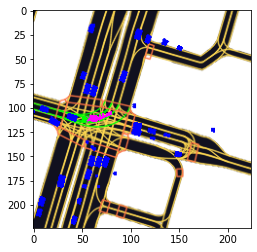

In [37]:
# image form


frame_id = 226
data = image_dataset[frame_id]

im = data["image"].transpose(1, 2, 0)
im = image_dataset.rasterizer.to_rgb(im)
target_positions_pixels = transform_points(data["target_positions"], data["raster_from_agent"])
draw_trajectory(im, target_positions_pixels, TARGET_POINTS_COLOR, yaws=data["target_yaws"])

plt.imshow(im)
plt.show()

## Vector representation visualization

dict_values(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
| Num Scenes | Num Frames | Num Agents | Num TR lights | Total Time (hr) | Avg Frames per Scene | Avg Agents per Frame | Avg Scene Time (sec) | Avg Frame frequency |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
|     1      |    249     |   22099    |      6228     |       0.01      |        249.00        |        88.75         |        24.90         |        10.00        |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
[20]
[(30, 20, 3)]
20
what is point? [array([[

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


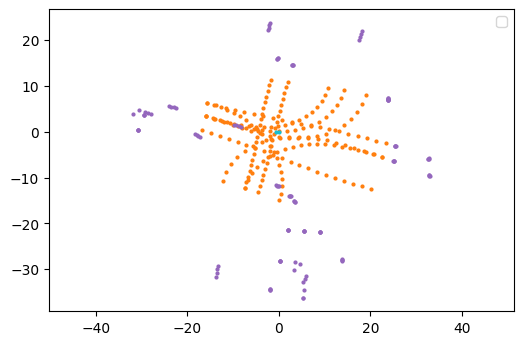

In [36]:
# point/vector form
import matplotlib.colors as mcolors
print(mcolors.TABLEAU_COLORS.values())

print(train_dataset)
frame_id = 226
tr_sample = train_dataset[frame_id]

# obstacle 
polyline_keys = [
    "lanes_mid",
    # "crosswalks",
    # "lanes",
     ]
print([tr_sample[key].shape[-2] for key in polyline_keys])

# batch size x num lanes x num vectors x num features
print([tr_sample[key].shape for key in polyline_keys])
max_num_vectors = max([tr_sample[key].shape[-2] for key in polyline_keys])
print(max_num_vectors)
print("what is point?", [tr_sample[key][1] for key in polyline_keys])


num_lanes = 10

plt.figure(dpi=100)
for ix, key in enumerate(polyline_keys):
    i_label = 0
    for i in range(num_lanes):
        for x, y, z in tr_sample[key][i]:
            i_label += 1
            plt.plot(
                x, y, 'o', color=list(mcolors.TABLEAU_COLORS.values())[ix*2+1], markersize=2,
                # label = label_,
            )
# vehicle

print("Output vehicle")

agent_key = [
    "agent_trajectory_polyline",
    "other_agents_polyline",
]
print([tr_sample[key].shape for key in agent_key])


for ix, key in enumerate(agent_key):
    print(key)
    print(tr_sample[agent_key[ix]])
    print()

for x, y, z in tr_sample[agent_key[0]]:   
    if x == 0:
        continue
    plt.plot(x, y, 'o', color=mcolors.TABLEAU_COLORS['tab:cyan'], markersize=2)
    
for a in tr_sample[agent_key[1]]:
    for x, y, z in a:
        if x == 0:
            continue
        plt.plot(x, y, 'o', color=list(mcolors.TABLEAU_COLORS.values())[ix*2+2], markersize=2)

plt.axis('equal')
plt.legend()


## Vector representation visualization + bounding box

In [15]:
## test for bounding box

print(tr_sample.keys())
agent_key = [
    "agent_trajectory_polyline",
    "other_agents_polyline",
]

agent_key_extent = [
    "extent",
    "all_other_agents_history_extents",
]


from l5kit.planning import utils


centroid = tr_sample[agent_key[0]][0]
yaws = tr_sample['history_yaws'][0]
extent = tr_sample[agent_key_extent[0]]

print()
print(centroid)
print(yaws)
print(extent)

ego_bbox = utils._get_bounding_box(centroid=centroid, yaw=yaws, extent=extent)
print(ego_bbox)
print(ego_bbox.exterior.xy)


dict_keys(['extent', 'type', 'agent_from_world', 'world_from_agent', 'target_positions', 'target_yaws', 'target_extents', 'target_availabilities', 'history_positions', 'history_yaws', 'history_extents', 'history_availabilities', 'centroid', 'yaw', 'speed', 'all_other_agents_history_positions', 'all_other_agents_history_yaws', 'all_other_agents_history_extents', 'all_other_agents_history_availability', 'all_other_agents_future_positions', 'all_other_agents_future_yaws', 'all_other_agents_future_extents', 'all_other_agents_future_availability', 'all_other_agents_types', 'agent_trajectory_polyline', 'agent_polyline_availability', 'other_agents_polyline', 'other_agents_polyline_availability', 'lanes', 'lanes_availabilities', 'lanes_mid', 'lanes_mid_availabilities', 'crosswalks', 'crosswalks_availabilities', 'scene_index', 'host_id', 'timestamp', 'track_id'])

[9.769963e-15 0.000000e+00 0.000000e+00]
[0.]
[4.87 1.85 1.8 ]
POLYGON ((2.434999942779541 0.925000011920929, 2.434999942779541 -0.9

In [16]:
AGENT_TRAJECTORY_POLYLINE = "agent_trajectory_polyline"
AGENT_TRAJECTORY_POLYLINE_2 = "history_positions"
AGENT_YAWS = "history_yaws"
AGENT_EXTENT = "extent"

OTHER_AGENTS_POLYLINE = "other_agents_polyline"
OTHER_AGENTS_POLYLINE_2 = "all_other_agents_history_positions"
OTHER_AGENTS_YAWS = "all_other_agents_history_yaws"
OTHER_AGENTS_EXTENTS = "all_other_agents_history_extents"

# Check whether two parameters represent the same values~
print(tr_sample[AGENT_TRAJECTORY_POLYLINE])
print(tr_sample[AGENT_TRAJECTORY_POLYLINE_2])

print(tr_sample[OTHER_AGENTS_POLYLINE][:3])
print(tr_sample[OTHER_AGENTS_POLYLINE_2][:3])


[[ 9.7699626e-15  0.0000000e+00  0.0000000e+00]
 [-5.8131206e-01 -5.2113584e-03 -4.8182011e-03]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00]]
[[ 9.7699626e-15  0.0000000e+00]
 [-5.8131206e-01 -5.2113584e-03]
 [-0.0000000e+00 -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00]]
[[[ 22.390882  -25.281326    1.5914772]
  [ 22.40629   -25.279602    1.5840881]
  [ 22.37106   -25.282646    1.5764606]
  [ 22.371191  -25.27994     1.5752094]]

 [[  7.4477515 -13.501395   -1.1860937]
  [  7.2512846 -12.926022   -1.1595827]
  [  7.0038385 -12.270514   -1.1149824]
  [  6.806224  -11.681177   -1.0797307]]

 [[  9.757345   24.038475   -1.608402 ]
  [  9.765817   24.471073   -1.608851 ]
  [  9.749732   24.975147   -1.6012702]
  [  9.777847   25.44252    -1.6053585]]]
[[[ 22.390882  -25.281326 ]
  [ 22.40629   -25.279602 ]
  [ 22.37106   -25.282646 ]
  [ 22.371191  -25.27994  ]]

 [[  7.4477515 -13.501395 ]
  [  7.2512846 -12.926022 ]
  [  7.0038385 -12

In [17]:
print(train_dataset[0][AGENT_TRAJECTORY_POLYLINE])
print(train_dataset[1][AGENT_TRAJECTORY_POLYLINE])
# print(train_dataset[2][AGENT_TRAJECTORY_POLYLINE])
# print(train_dataset[3][AGENT_TRAJECTORY_POLYLINE])
# print(train_dataset[220][AGENT_TRAJECTORY_POLYLINE])

# Check the order of historical state.
# We find that current state if the first one in four-dim vectors
print(train_dataset[0][OTHER_AGENTS_POLYLINE][:1])
print(train_dataset[1][OTHER_AGENTS_POLYLINE][:1])


[[-3.5527137e-14  1.1368684e-13  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00 -0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00 -0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00 -0.0000000e+00]]
[[-3.5527137e-14  1.1368684e-13  0.0000000e+00]
 [-3.5527137e-14  1.1368684e-13  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00 -0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00 -0.0000000e+00]]
[[[-1.3954793  -3.444512    0.00395346]
  [ 0.          0.         -0.        ]
  [ 0.          0.         -0.        ]
  [ 0.          0.         -0.        ]]]
[[[-1.0095567e+00 -3.4663560e+00 -1.4097691e-03]
  [-1.3954793e+00 -3.4445119e+00  3.9534569e-03]
  [ 0.0000000e+00  0.0000000e+00 -0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00 -0.0000000e+00]]]


dict_values(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
| Num Scenes | Num Frames | Num Agents | Num TR lights | Total Time (hr) | Avg Frames per Scene | Avg Agents per Frame | Avg Scene Time (sec) | Avg Frame frequency |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
|     1      |    249     |   22099    |      6228     |       0.01      |        249.00        |        88.75         |        24.90         |        10.00        |
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
[20]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Output vehicle
[(4, 3), (30, 4, 3)]
Ego current state
[2.842171e-14 0.000000e+00 0.000000e+00] [0.] [4.87 1.85 1.8 ]
Ego current state
[2.842171e-14 0.000000e+00 0.000000e+00] [0.] [4.87 1.85 1.8 ]
total 30


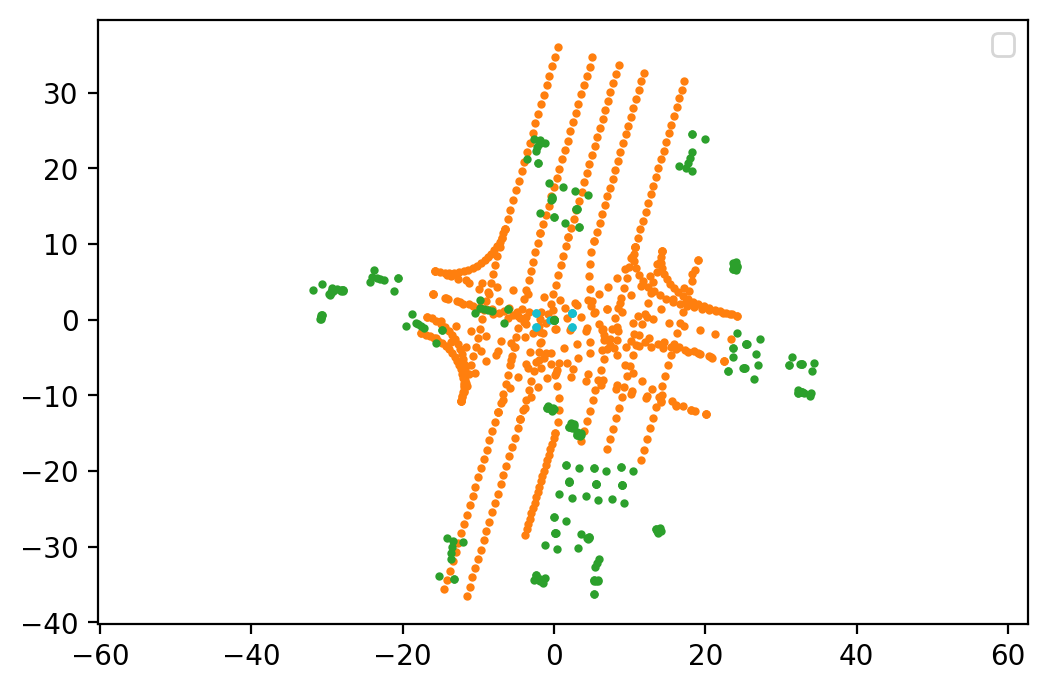

In [31]:
# point/vector form
import matplotlib.colors as mcolors
print(mcolors.TABLEAU_COLORS.values())

print(train_dataset)
frame_id = 226
tr_sample = train_dataset[frame_id]

# obstacle 
polyline_keys = [
    "lanes_mid",
    # "crosswalks",
    # "lanes",
]
print([tr_sample[key].shape[-2] for key in polyline_keys])

# batch size x num lanes x num vectors x num features
# print([tr_sample[key].shape for key in polyline_keys])
# max_num_vectors = max([tr_sample[key].shape[-2] for key in polyline_keys])
# print(max_num_vectors)
# print("what is point?", [tr_sample[key][1] for key in polyline_keys])

plt.figure(dpi=200)
for ix, key in enumerate(polyline_keys):
    i_label = 0
    for i in range(30):
        for x, y, z in tr_sample[key][i]:
            i_label += 1
            plt.plot(
                x, y, 'o', color=list(mcolors.TABLEAU_COLORS.values())[ix*2+1], markersize=2,
            )
# vehicle
print("Output vehicle")
print([tr_sample[key].shape for key in agent_key])


EGO = "ego"
OTHER_AGENTS = "other_agents"

def get_ego_current_state(_frame):
    centroid = _frame[AGENT_TRAJECTORY_POLYLINE][0]
    yaws = _frame[AGENT_YAWS][0]
    extent = _frame[AGENT_EXTENT]

    return centroid, yaws, extent


def get_agent_current_state(_frame, agent_ix):
    centroid = _frame[OTHER_AGENTS_POLYLINE][agent_ix][0]
    yaws = _frame[OTHER_AGENTS_YAWS][agent_ix][0]
    extent = _frame[OTHER_AGENTS_EXTENTS][agent_ix][0]

    return centroid, yaws, extent


# Ego
for x, y, z in tr_sample[AGENT_TRAJECTORY_POLYLINE]:
    if x == 0:
        continue
    plt.plot(x, y, 'o', color=mcolors.TABLEAU_COLORS['tab:cyan'], markersize=2)

    centroid, yaws, extent = get_ego_current_state(tr_sample)
    print("Ego current state")
    print(centroid, yaws, extent)
    ego_bbox = utils._get_bounding_box(centroid=centroid, yaw=yaws, extent=extent)
    xx, yy = ego_bbox.exterior.xy
    plt.plot(xx, yy, 'o', color=mcolors.TABLEAU_COLORS['tab:cyan'], markersize=2)

# Other agents
i = 0
for agent_id, agent_trajectory in enumerate(tr_sample[OTHER_AGENTS_POLYLINE]):
    i += 1
    for x, y, z in agent_trajectory:
        if x == 0:
            continue
        plt.plot(x, y, 'o',
                 color=list(mcolors.TABLEAU_COLORS.values())[ix*2+2],
                 markersize=2)
    centroid, yaws, extent = get_agent_current_state(tr_sample, agent_id)

    # print("Other agent current state")
    # print(centroid, yaws, extent)
    ego_bbox = utils._get_bounding_box(centroid=centroid, yaw=yaws, extent=extent)
    xx, yy = ego_bbox.exterior.xy
    plt.plot(xx, yy, 'o',
             color=list(mcolors.TABLEAU_COLORS.values())[ix*2+2],
             # color=mcolors.TABLEAU_COLORS['tab:cyan'],
             markersize=2)

plt.axis('equal')
plt.legend()
print("total", i)


In [19]:
tr_sample[OTHER_AGENTS_POLYLINE]

array([[[-13.657392  , -31.626368  ,  -1.7857891 ],
        [-13.564649  , -30.9068    ,  -1.7487255 ],
        [-13.441186  , -30.06617   ,  -1.7500305 ],
        [-13.2968855 , -29.2987    ,  -1.7538698 ]],

       [[ -8.250467  ,   1.0901719 ,  -0.31195712],
        [ -8.758765  ,   1.2481047 ,  -0.30841637],
        [ -9.247483  ,   1.3883162 ,  -0.31751394],
        [ -9.74714   ,   1.5271338 ,  -0.31793618]],

       [[  2.309545  , -13.952588  ,   2.7628424 ],
        [  2.4137747 , -13.99843   ,   2.7614    ],
        [  2.5361843 , -14.050098  ,   2.7576864 ],
        [  2.6156683 , -14.08933   ,   2.7480428 ]],

       [[ 18.25026   ,  22.114553  ,   1.2079184 ],
        [ 18.00105   ,  21.422672  ,   1.2007258 ],
        [ 17.717682  ,  20.739864  ,   1.2034853 ],
        [ 17.428452  ,  20.039919  ,   1.1894348 ]],

       [[-28.034904  ,   3.8672965 ,   0.11017632],
        [-28.66869   ,   4.057362  ,   0.09473395],
        [-29.304337  ,   4.2402105 ,   0.07924795],
    

## Get reward

Refer to UMBRELLA (Diehl, 2021) paper for the reward function in Appendix C.1 NGSIM which is r_prox + r_lane.

### Reward 1: distance to lane_mid

In [20]:
from l5kit.evaluation.metrics import distance_to_reference_trajectory

LANES_MID = "lanes_mid"
LANES_MID_AVAIL = "lanes_mid_availabilities"

# lane_mid reward
def get_distance_to_centroid(
        current_centroid,
        ref_lanes_mid,
        consider_avail=False,
    ):
    current_centroid = torch.tensor(current_centroid)
    ref_lanes_mid = torch.tensor(ref_lanes_mid)
    distance = distance_to_reference_trajectory(current_centroid, ref_lanes_mid)
    return distance

def get_distance_to_centroid_per_frame(_frame):
    ego_centroid, _, _ = get_ego_current_state(_frame)
    ego_centroid = ego_centroid[:2]
    ego_centroid = np.expand_dims(ego_centroid, 0)
    # print("EGO CENTROID")
    # print(ego_centroid.shape)

    # todo 需要先筛选出ego行进路线的车道中线，而不是将所有车道中线都考虑
    # print("CENTROID")
    lanes_mid = _frame[LANES_MID]
    # print(lanes_mid.shape) # number of lane_mid, number of point for each lane_mid
    lanes_mid = lanes_mid[:, :, :2]  # only keep x, y
    lanes_mid = lanes_mid.reshape(-1, 2)
    lanes_mid = np.expand_dims(lanes_mid, 0)
    # print(lanes_mid.shape)

    distance = get_distance_to_centroid(ego_centroid, lanes_mid)
    distance = distance.numpy()[0]
    return distance


get_distance_to_centroid_per_frame(tr_sample)

0.079421826

In [21]:
all_distance_rew = [get_distance_to_centroid_per_frame(frame) for frame in train_dataset]
all_distance_rew = np.array(all_distance_rew)

print("max", np.max(all_distance_rew), np.argmax(all_distance_rew))
print("min", np.min(all_distance_rew), np.argmin(all_distance_rew))
all_distance_rew

max 1.2125396 245
min 0.079421826 226


array([0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 ,
       0.1447223 , 0.1447223 , 0.1447223 , 0.1447223 , 0.14472

### Reward 2: minimal distance to other agents

In [22]:
# proximity reward 与其他agent最短距离
from l5kit.evaluation.metrics import detect_collision
def get_distance_to_other_agents(
        ego_centroid,
        ego_yaw,
        ego_extent,
        agent_centroid,
        agent_yaw,
        agent_extent,
    ):
    ego_bbox = utils._get_bounding_box(ego_centroid, ego_yaw, ego_extent)
    agent_bbox = utils._get_bounding_box(agent_centroid, agent_yaw, agent_extent)
    distance = ego_bbox.distance(agent_bbox)
    return distance


def get_distance_to_other_agents_per_frame(_frame):
    distance_list = []
    ego_info = get_ego_current_state(_frame)
    # agent_ix = 25

    agents_type = _frame["all_other_agents_types"]
    agents_extent = np.mean(_frame[OTHER_AGENTS_EXTENTS][:,0,:], axis=1)
    # print("agent_extent")
    # print(agents_extent)

    # agent_type = 0 or agent_extent = [0, 0] is null and unavailable
    agent_ix_avail = np.nonzero(agents_type * agents_extent)[0]
    # print(agent_ix_avail)

    for agent_ix in agent_ix_avail:
        agent_info = get_agent_current_state(_frame, agent_ix)
        dist = get_distance_to_other_agents(*ego_info, *agent_info)
        distance_list.append(dist)

    return np.min(distance_list), np.argmin(distance_list), distance_list


# dist, dist_list = get_distance_to_other_agents_per_frame(tr_sample)
dist, min_dist_index, dist_list = get_distance_to_other_agents_per_frame(train_dataset[226])
print(dist)
# print(min_dist_index)

3.6960733471446736


In [23]:
distant_to_agents = [get_distance_to_other_agents_per_frame(frame)[0] for frame in train_dataset]
distant_to_agents = np.array(distant_to_agents)

print("max", np.max(distant_to_agents), np.argmax(distant_to_agents))
print("min", np.min(distant_to_agents), np.argmin(distant_to_agents))
distant_to_agents


max 5.527246952056885 179
min 1.1314915929163547 104


array([1.48144025, 1.56004559, 1.41349678, 1.49129454, 1.42683781,
       1.40938968, 1.46722358, 1.43750739, 1.45259912, 1.49379912,
       1.50334714, 1.52970786, 1.50888647, 1.52343506, 1.51537872,
       1.6032866 , 1.78216637, 2.02019363, 2.21485385, 2.29670858,
       2.28724909, 2.27770901, 2.27958345, 2.28071642, 2.29697323,
       2.28589058, 2.28767014, 2.28725624, 2.27928543, 2.27101755,
       2.2651639 , 2.27008963, 2.26262236, 2.25718737, 2.2546382 ,
       2.29293394, 2.28361034, 2.2772131 , 2.27236891, 2.26906013,
       2.26469707, 2.25991821, 2.29924393, 2.29177523, 2.28542042,
       2.27801752, 2.27319574, 2.26803064, 2.26245451, 2.25878382,
       2.25815535, 2.25517941, 2.25429344, 2.25297546, 2.2534318 ,
       2.2761693 , 2.27100182, 2.26800919, 2.26500988, 2.26261139,
       2.26178885, 2.25889492, 2.25909805, 2.25683641, 2.29127359,
       2.28165627, 2.2752037 , 2.26964188, 2.26681662, 2.26271534,
       2.26075077, 2.25918674, 2.25858259, 2.25650978, 2.25418

In [24]:
train_dataset[226]["all_other_agents_types"]

array([ 3,  3, 14,  3,  3, 14,  3,  3,  3,  3,  3,  3,  3, 14, 14,  3,  3,
        3,  3, 14,  3,  3,  3,  3,  3, 14,  3,  3, 14,  0])

In [25]:
from shapely.geometry import Polygon

poly_1 = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
poly_2 = Polygon([[0.5, 0.5], [1, 3], [0.5, 4], [0, 3], [0.5, 0.5]])

poly_1.distance(poly_2)


0.0